In [1]:
import cPickle as pickle
import scipy.interpolate as interp
sys.path.append('../src')
import Analyzer
import Grapher
import Munger
import PAD
import Plasma_Plotter
import Scraper

# Import the project-specific files

In [2]:
obs_files = pickle.load(open('c:/Users/cschiff/Documents/github/Simon_Wing_Proposal_12_28_2015.data_local','r')) 
obs = 'mms1'
m1f = obs_files[obs]

In [3]:
m1f['edist_f']

['c:/Yuggoth/mms1/fpi/fast/l2/des-dist/2015/12/mms1_fpi_fast_l2_des-dist_20151228220000_v3.3.0.cdf']

# Create the munges

In [4]:
fgm_munge = Munger.make_munge_via_translation(obs,'fgm',Munger.fgm_delta_srvy,m1f['fgm_s'],Munger.fgm_translation_srvy) 

segment 1 - start: 2015-12-28 00:00:00.730827 stop 2015-12-29 00:00:01.848735
fresh segment - first stride
Munged 1 series for fgm on mms1!


In [5]:
edist_munge = Munger.make_munge_via_translation(obs,'edist',Munger.des_delta_fast,m1f['edist_f'],Munger.edist_translation_fast)

segment 1 - start: 2015-12-28 22:00:01.526745 stop 2015-12-28 23:59:57.079411
fresh segment - first stride
Munged 1 series for edist on mms1!


In [6]:
emoms_munge = Munger.make_munge_via_translation(obs,'emoms',Munger.des_delta_fast,m1f['emoms_f'],Munger.emoms_translation_fast)

segment 1 - start: 2015-12-28 22:00:01.526745 stop 2015-12-28 23:59:57.079411
fresh segment - first stride
Munged 1 series for emoms on mms1!


In [7]:
epsd_munge  = Munger.make_munge_via_translation(obs,'epsd',Munger.epsd_delta,m1f['epsd_f'],Munger.epsd_translation)
mec_munge   = Munger.make_munge_via_translation(obs,'mec',Munger.mec_delta,m1f['mec_s'],Munger.mec_translation)

segment 1 - start: 2015-12-28 21:43:17.751638 stop 2015-12-28 23:59:57.860638
fresh segment - first stride
Munged 1 series for epsd on mms1!
segment 1 - start: 2015-12-28 00:00:00 stop 2015-12-28 23:59:30
fresh segment - first stride
Munged 1 series for mec on mms1!


In [8]:
edist_munge = Munger.make_munge_via_translation(obs,'edist_f',Munger.des_delta_fast,m1f['edist_f'],Munger.edist_translation_fast)

segment 1 - start: 2015-12-28 22:00:01.526745 stop 2015-12-28 23:59:57.079411
fresh segment - first stride
Munged 1 series for edist_f on mms1!


# Adapt Select Munges and check interpolation

In [9]:
efgm_munge = Munger.adapt_munge_to_munge(fgm_munge,emoms_munge)

fgm flavored


(-60, 60)

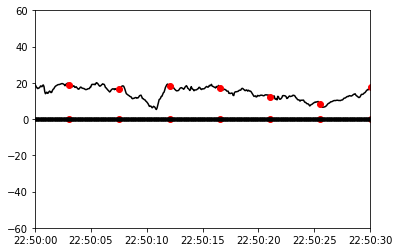

In [10]:
comp = 1
eQ = np.zeros(emoms_munge[0]['epochs'].shape)
fQ = np.zeros(fgm_munge[0]['epochs'].shape)
plt.plot(emoms_munge[0]['epochs'],eQ,'ro')
plt.plot(fgm_munge[0]['epochs'],fQ,'k.')
plt.plot(fgm_munge[0]['epochs'],fgm_munge[0]['Bgse'][:,comp],'k-')
plt.plot(efgm_munge[0]['epochs'],efgm_munge[0]['Bgse'][:,comp],'ro')
time_step = dt.timedelta(seconds=30)
#n = 645  #random (maybe) point in the middle
n = 100     #start of the series
#n = 2145  #end of the series
plt.xlim([dt.datetime(2015,12,28,22,0,0,0)+n*time_step,dt.datetime(2015,12,28,22,0,30,0)+n*time_step])
plt.ylim([-60,60])

# Create appropriate figures

In [11]:
#specify the time
t_anchor = dt.datetime(2015,12,28,22,0,0)
t_window = dt.timedelta(minutes=15.0)
t_step   = dt.timedelta(minutes=5.0) 
n        = 0
t_start  = t_anchor+n*t_step 
t_stop   = t_start+t_window

../src\Plasma_Plotter.py:406: RuntimeWarning: divide by zero encountered in log10
  s1 = np.ma.masked_invalid(np.log10(psd_munge[0][field])).T


[Text(735961,0,u'22:00\n7.399\n-6.709\n-0.786\n8.924'),
 Text(735961,0,u'22:02\n7.431\n-6.709\n-0.789\n8.931'),
 Text(735961,0,u'22:04\n7.464\n-6.709\n-0.792\n8.938'),
 Text(735961,0,u'22:06\n7.495\n-6.709\n-0.795\n8.946'),
 Text(735961,0,u'22:08\n7.527\n-6.708\n-0.798\n8.953'),
 Text(735961,0,u'22:10\n7.559\n-6.707\n-0.801\n8.960'),
 Text(735961,0,u'22:12\n7.590\n-6.707\n-0.804\n8.967'),
 Text(735961,0,u'22:14\n7.622\n-6.706\n-0.807\n8.974')]

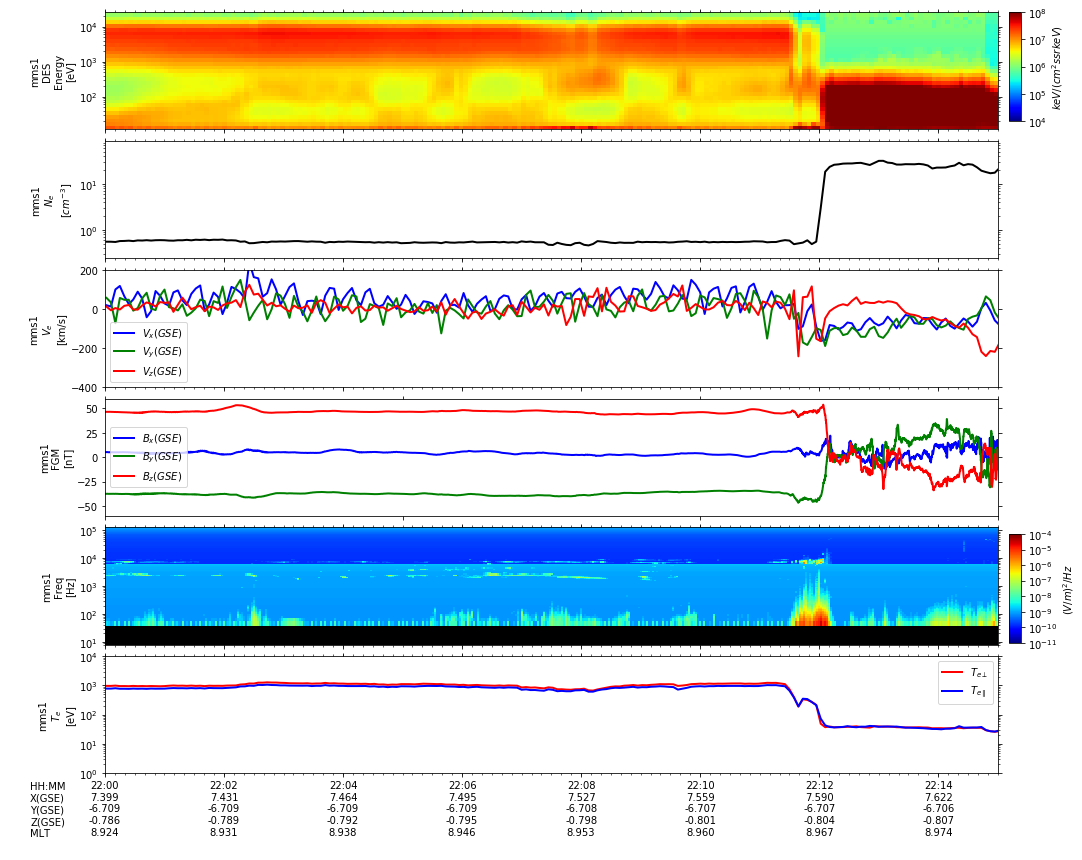

In [12]:
#create the figure
num_rows = 6
num_cols = 1
fig = plt.figure(figsize=(16,14))
ax_DES   = fig.add_subplot(num_rows,num_cols,1)
ax_den   = fig.add_subplot(num_rows,num_cols,2)
ax_Ve    = fig.add_subplot(num_rows,num_cols,3)
ax_B     = fig.add_subplot(num_rows,num_cols,4)
ax_EPSD  = fig.add_subplot(num_rows,num_cols,5)
ax_T     = fig.add_subplot(num_rows,num_cols,6)

#load the panels
DES  = Plasma_Plotter.make_Et_panel(fig,ax_DES,obs,emoms_munge,'DES',0,4,8)
Den  = Plasma_Plotter.make_sdensity_panel(ax_den,obs,emoms_munge,'emoms')
Ve   = Plasma_Plotter.make_sVvector_panel(ax_Ve,obs,emoms_munge,'emoms')
Bvec = Plasma_Plotter.make_Bvector_panel(ax_B,obs,fgm_munge)
EPSD = Plasma_Plotter.make_psd_panel(fig,ax_EPSD,obs,epsd_munge,'epsd')
T    = Plasma_Plotter.make_stemperature_panel(ax_T,obs,emoms_munge,'emoms')

#set the time formatting
t_major_parms = {'loc':mdates.MinuteLocator,'by':range(0,60,2),  'int':1,'form':'%H:%M'}
t_minor_parms = {'loc':mdates.SecondLocator,'by':range(0,60,10),'int':1,'form':''}

#customize the axes
DES.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Den.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Ve.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
EPSD.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
T.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')

ax_DES.set_xticklabels([])
ax_den.set_xticklabels([])
ax_Ve.set_xticklabels([])
ax_B.set_xticklabels([])
ax_EPSD.set_xticklabels([])
Ve.customize_ax({'ylim':[-400,200]})
Bvec.customize_ax({'ylim':[-60,60]})
Den.customize_ax({'yscale':'log'})
Ve.customize_ax({'xticklabels':[]})

ax_DES.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_den.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_Ve.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_B.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_EPSD.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_T.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])

ax_DES.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_den.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_Ve.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_B.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_EPSD.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_T.tick_params(which='both',bottom=True,top=True,left=True,right=True)


Grapher.add_info_box(fig,(0.06,0.063,0.04,0.04),'HH:MM\nX(GSE)\nY(GSE)\nZ(GSE)\nMLT',border='off')

plt.subplots_adjust(hspace=0.1)

fig.canvas.draw_idle()

tknots = ax_T.get_xticks()
tlabs  = ax_T.get_xticklabels()
counter = 0
for item in tlabs:
    pos        = Analyzer.calculate_mec_to_tknot(tknots[counter],mec_munge,'gse')
    decoration = '\n'+'{0:.3f}\n{1:.3f}\n{2:.3f}\n{3:.3f}'.format(pos[0],pos[1],pos[2],pos[3])
    tlabs[counter].set_text(item.get_text()+decoration)
    counter += 1
ax_T.set_xticklabels(tlabs)

In [13]:
#fig.savefig('c:/Users/cschiff/Documents/github/MMS1_Moments_panel_12_28_2015_2200-2215.eps')

In [14]:
Analyzer.make_record_varying(edist_munge,'thetas')
Analyzer.make_record_varying(edist_munge,'phis')
Analyzer.calculate_incoming_particle_directions(edist_munge)
Analyzer.calculate_pitch_angles(fgm_munge,edist_munge)
Analyzer.calculate_differential_number_flux(edist_munge,'electrons')
Analyzer.calculate_omni_number_flux(edist_munge)

fgm flavored


In [15]:
timelabel = 25

In [16]:
num_angs = 10
num_ergs = 32
Q        = np.zeros((num_angs-1,num_ergs))
for erg in range(num_ergs):
    ang_bins, Q[:,erg] = Analyzer.calculate_energy_PAD_at_time_and_energy(edist_munge,timelabel,erg,num_angs)

2015-12-28 22:01:54.027541


Text(1.05,51.2716,u'$E$ = 20218eV')

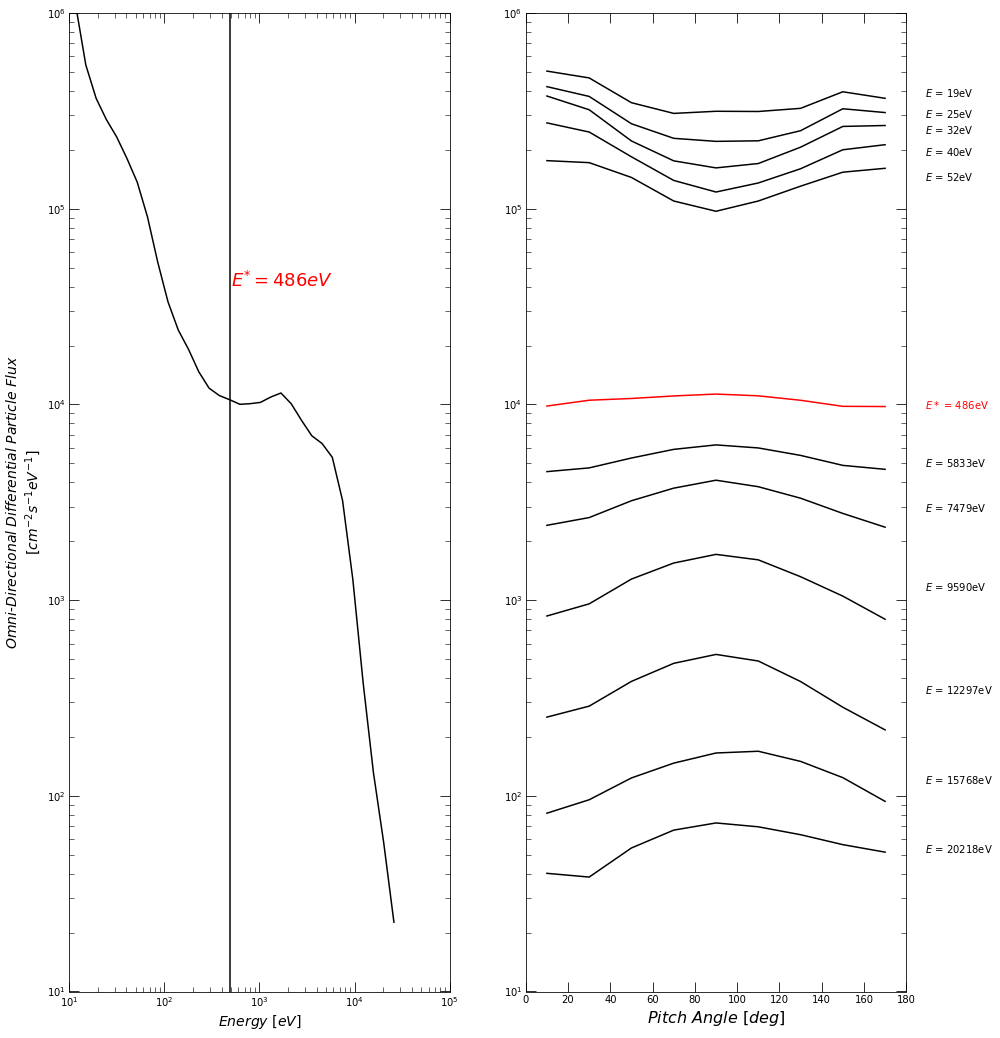

In [17]:
fig_dist = plt.figure(figsize=(15,18))
ax_omni  = fig_dist.add_subplot(1,2,1)
ax_PAD   = fig_dist.add_subplot(1,2,2)
print edist_munge[0]['epochs'][timelabel]
ax_omni.loglog(edist_munge[0]['ergs'][timelabel],edist_munge[0]['omni_jn'][timelabel,:]*4*np.pi,'k-')
ax_omni.set_xlim([1e1,1e5])
ax_omni.set_ylim([1e1,1e6])
ax_omni.axes.tick_params(direction='in',length=10,which='major',bottom=True,top=True,left=True,right=True)
ax_omni.axes.tick_params(direction='in',length=5,which='minor',bottom=True,top=True,left=True,right=True)
ax_omni.axvline(x=485,color='k')
ax_omni.set_xlabel('$Energy$ $[eV]$',fontsize=14)
ax_omni.set_ylabel('$Omni$-$Directional$ $Differential$ $Particle$ $Flux$\n[$cm^{-2}s^{-1}eV^{-1}$]',fontsize=14)
ax_omni.annotate('$E^{*} = 486 eV$',xy=(500,4e4),color='r',fontsize=18)

ax_PAD.semilogy(ang_bins,Q[:,2],'k-')
ax_PAD.semilogy(ang_bins,Q[:,3],'k-')
ax_PAD.semilogy(ang_bins,Q[:,4],'k-')
ax_PAD.semilogy(ang_bins,Q[:,5],'k-')
ax_PAD.semilogy(ang_bins,Q[:,6],'k-')
ax_PAD.semilogy(ang_bins,Q[:,15],'r-')
ax_PAD.semilogy(ang_bins,Q[:,25],'k-')
ax_PAD.semilogy(ang_bins,Q[:,26],'k-')
ax_PAD.semilogy(ang_bins,Q[:,27],'k-')
ax_PAD.semilogy(ang_bins,Q[:,28],'k-')
ax_PAD.semilogy(ang_bins,Q[:,29],'k-')
ax_PAD.semilogy(ang_bins,Q[:,30],'k-')
ax_PAD.legend()
ax_PAD.set_xlim([0,180])
ax_PAD.set_ylim([1e1,1e6])
ax_PAD.axes.tick_params(direction='in',length=10,which='major',bottom=True,top=True,left=True,right=True)
ax_PAD.axes.tick_params(direction='in',length=5,which='minor',bottom=True,top=True,left=True,right=True)
ax_PAD.set_xlabel('$Pitch$ $Angle$ $[deg]$',fontsize=16)
trans = ax_PAD.get_yaxis_transform() # x in data units, y in axes fraction
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,2]), xy=(1.05, np.average(Q[:,2]) ), xycoords=trans)
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,3]), xy=(1.05, np.average(Q[:,3]) ), xycoords=trans)
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,4]), xy=(1.05, np.average(Q[:,4]) ), xycoords=trans)
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,5]), xy=(1.05, np.average(Q[:,5]) ), xycoords=trans)
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,6]), xy=(1.05, np.average(Q[:,6]) ), xycoords=trans)
ax_PAD.annotate('$E*$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,15]), xy=(1.05, 0.9*np.average(Q[:,15]) ), xycoords=trans,color='r')
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,25]), xy=(1.05, 0.9*np.average(Q[:,25]) ), xycoords=trans)
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,26]), xy=(1.05, 0.9*np.average(Q[:,26]) ), xycoords=trans)
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,27]), xy=(1.05, 0.9*np.average(Q[:,27]) ), xycoords=trans)
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,28]), xy=(1.05, 0.9*np.average(Q[:,28]) ), xycoords=trans)
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,29]), xy=(1.05, 0.9*np.average(Q[:,29]) ), xycoords=trans)
ax_PAD.annotate('$E$ = {:.0f}eV'.format(edist_munge[0]['ergs'][timelabel,30]), xy=(1.05, 0.9*np.average(Q[:,30]) ), xycoords=trans)

In [18]:
#fig_dist.savefig('c:/Users/cschiff/Documents/github/MMS1_PAD_panel_12_28_2015_220154.eps')